# K Nearest Neighbors Model

In this notebook we will expirement with a knn model to get an optimal predicted repair time.

## Imports

In [1]:
from pandas import read_csv as pd_read_csv
from numpy import sqrt as np_sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

## Fetching

In [2]:
df = pd_read_csv("../Data/CSV/cleaned.csv", sep=';', low_memory=False)
print(f'No less than {df.shape[0]} rows and {df.shape[1]} columns!')

No less than 252751 rows and 12 columns!


## Model

In [11]:
model = KNeighborsClassifier(n_neighbors=20)

feature_names = ['prioriteit', 'oorzaakcode', 'geocode']
features = df[feature_names]
target_names = ['hersteltijd_15']
targets = df[target_names]
# normalize for beter model results.
normalized_features=(features-features.mean())/features.std()
#: Split data into train set (80%) and test set (20%).
features_train, features_test, targets_train, targets_test = train_test_split(normalized_features, targets, random_state=10)
model.fit(features_train, targets_train.values.ravel())
print(f'{len(features_train)} elementen in de trainset en {len(features_test)} elementen in de testset')

189563 elementen in de trainset en 63188 elementen in de testset


In [4]:
#: We calculate the module score by using the test set, 
#: this is why splitting your data into a training and test set is important.
score_1 = model.score(features_test, targets_test)

# An alternative way to calculate the predicted value is by predicting the model's targets by using the features test as input
# and scoring it against the actual targets of the test set.
targets_model = model.predict(features_test)
score_2 = accuracy_score(targets_test, targets_model)
print(f'Scores (methode 1 = {score_1}) and (methode 2 = {score_2}) so the methods are equal is {score_1 == score_2}.')
print(f'With a mean error of: {np_sqrt(mean_squared_error(targets_test, targets_model))}')

Scores (methode 1 = 0.3195226941824397) and (methode 2 = 0.3195226941824397) so the methods are equal is True.
With a mean error of: 51.15788735995665


## Displaying

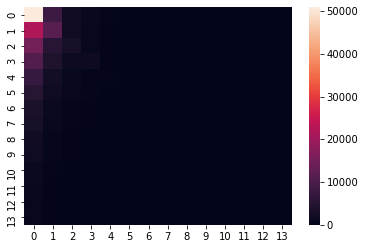

In [5]:
targets_model = model.predict(features_train)
conf = confusion_matrix(targets_train, targets_model)
sns.heatmap(conf)

We see that the model predicts 0 at a good rate but the rest of the predictions are bad, but it predicts more values in contrast to our previous model.

## Predicting

In [6]:
subset_df = pd_read_csv("../Data/CSV/subset.csv", sep=';')
features = subset_df[feature_names]
targets = subset_df['hersteltijd_15']
subset_df.head()

,meldnummer,oorzaakcode,prioriteit,melddatum,geocode,beschrijving,hersteltijd,hersteltijd_15,hersteltijd_dt,hersteltijd_lr
0,80774347,130,9,2014-07-31 10:28:00,555,test ESB,2,0,0,0
1,80626718,298,9,2011-07-31 11:43:00,666,"Mtna : E-boog AC-trip aangesproken, geen trei...",1,0,0,0
2,80878866,221,9,2017-01-31 10:43:25,564,Gvc : Inttel geeft fout melding.,186,180,180,0
3,80704628,221,9,2013-01-31 09:20:00,114,"Wspl : RH60 gelijkrichter defect, er staa een...",59,45,0,0
4,80651548,221,9,2012-01-31 01:52:00,76,Bv-Utg : sp BA t.o.b.s. gemaakt tijdens werkz...,155,150,0,0


In [7]:
targets_model = model.predict(features)
score = accuracy_score(targets, targets_model)
print(f'Score = {score}, predictions = {targets_model}, ground truth = {targets.values}.')

Score = 0.5, predictions = [ 0  0  0  0 15  0  0  0  0  0], ground truth = [  0   0 180  45 150   0 195   0   0  45].


With a score of 0.5 we would think that it does reasonable well but we see that a lot of the answers are using it's default answer (0).

## Saving

In [8]:
subset_df['hersteltijd_knn'] = targets_model
subset_df.to_csv('../Data/CSV/subset.csv', sep=';', index=False)

## Conclusion

With a score of ~0.32 the model scores suboptimal, the best model is the decision tree model with the best practical results with you can see in the GUI and the predicting section of the notebook.